# Unravelling the Nexus: 
# Investigating the Influence of Student Demographics on SAT Scores across New York City Boroughs

## Table of Contents

- [Introduction](#Introduction)  
- [Data Cleaning/Loading](#Data-Cleaning/Loading)  
- [Summary Statistics Tables](#Summary-Statistics-Tables)  
- [Plots, Histograms, Figures](#Plots-Histograms-Figures)  
- [Conclusion](#Conclusion)
- [Reference](#Reference)

## Introduction


## Data Cleaning/Loading

In [89]:
import pandas as pd

file = r"C:\Users\35911\Desktop\ECO225 Project\Data\scores.csv"
rawData = pd.read_csv(file)
rawData.head()


,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%


In [90]:
num_rows = len(rawData) 
print(num_rows)

435


In [92]:
# Filter out rows with N/A values
cleaned_score = rawData.dropna()
num_rows_cleaned = len(cleaned_score)
print(num_rows_cleaned)

374


In [93]:
cleaned_score.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%


In [94]:
# Removing duplicates
cleaned_score = cleaned_score.drop_duplicates()
num_rows_cleaned = len(cleaned_score)
print(num_rows_cleaned)

374


In [15]:
# Replace 'sat_reading', 'sat_math', and 'sat_writing' with the actual column names in your DataFrame

# Create a new column 'total_sat_scores' by adding the SAT reading, math, and writing scores
cleaned_data['SAT Score'] = cleaned_data['Average Score (SAT Math)'] + cleaned_data['Average Score (SAT Reading)'] + cleaned_data['Average Score (SAT Writing)'] 

# Display the DataFrame with the new variable
print(cleaned_data.head())


  School ID                                        School Name    Borough  \
2    01M539  New Explorations into Science, Technology and ...  Manhattan   
3    02M294                               Essex Street Academy  Manhattan   
4    02M308                       Lower Manhattan Arts Academy  Manhattan   
5    02M545    High School for Dual Language and Asian Studies  Manhattan   
6    01M292      Henry Street School for International Studies  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Student Enrollment Percent White Percent Black  \
2  -73

In [96]:
# Created the sum of average reading, writing, and math scores
cleaned_score['Total Average Score'] = cleaned_score['Average Score (SAT Math)'] + cleaned_score['Average Score (SAT Reading)'] + cleaned_score['Average Score (SAT Writing)']
print(cleaned_score.head())


  School ID                                        School Name    Borough  \
2    01M539  New Explorations into Science, Technology and ...  Manhattan   
3    02M294                               Essex Street Academy  Manhattan   
4    02M308                       Lower Manhattan Arts Academy  Manhattan   
5    02M545    High School for Dual Language and Asian Studies  Manhattan   
6    01M292      Henry Street School for International Studies  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Student Enrollment Percent White Percent Black  \
2  -73

In [102]:
cleaned_score['White'] = cleaned_score['Percent White'].str.replace('[^\d.]', '', regex=True)
cleaned_score['White'] = cleaned_score['White'].astype(float)
print(cleaned_score['White'].head())


2    28.6
3    11.7
4     3.1
5     1.7
6     3.9
Name: White, dtype: float64


In [103]:
cleaned_score['Black'] = cleaned_score['Percent Black'].str.replace('[^\d.]', '', regex=True)
cleaned_score['Black'] = cleaned_score['Black'].astype(float)
print(cleaned_score['Black'].head())

2    13.3
3    38.5
4    28.2
5     3.1
6    24.4
Name: Black, dtype: float64


In [104]:
cleaned_score['Hispanic'] = cleaned_score['Percent Hispanic'].str.replace('[^\d.]', '', regex=True)
cleaned_score['Hispanic'] = cleaned_score['Hispanic'].astype(float)
print(cleaned_score['Hispanic'].head())

2    18.0
3    41.3
4    56.9
5     5.5
6    56.6
Name: Hispanic, dtype: float64


In [105]:
cleaned_score['Asian'] = cleaned_score['Percent Asian'].str.replace('[^\d.]', '', regex=True)
cleaned_score['Asian'] = cleaned_score['Asian'].astype(float)
print(cleaned_score.head())

  School ID                                        School Name    Borough  \
2    01M539  New Explorations into Science, Technology and ...  Manhattan   
3    02M294                               Essex Street Academy  Manhattan   
4    02M308                       Lower Manhattan Arts Academy  Manhattan   
5    02M545    High School for Dual Language and Asian Studies  Manhattan   
6    01M292      Henry Street School for International Studies  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Percent Asian Average Score (SAT Math)  \
2  -73.97943  

In [106]:
# Create race "other" which includes students that are not white, black, hispanic, or Asian. 
cleaned_score['Other'] = 100 - cleaned_score['White'] -  cleaned_score['Black'] -  cleaned_score['Hispanic'] -  cleaned_score['Asian'] 
print(cleaned_score.head())

  School ID                                        School Name    Borough  \
2    01M539  New Explorations into Science, Technology and ...  Manhattan   
3    02M294                               Essex Street Academy  Manhattan   
4    02M308                       Lower Manhattan Arts Academy  Manhattan   
5    02M545    High School for Dual Language and Asian Studies  Manhattan   
6    01M292      Henry Street School for International Studies  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002  40.71873   
3          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
4          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
5          M445     350 Grand Street  Manhattan    NY     10002  40.71687   
6          M056     220 Henry Street  Manhattan    NY     10002  40.71376   

   Longitude  ... Average Score (SAT Math) Average Score (SAT Reading)  \


## Summary Statistics Tables

In [128]:



# Calculate summary statistics for variables of interest
summary_stats = cleaned_score[['White', 'Black', 'Hispanic', 'Asian', 'Total Average Score']].describe()
# Rename columns and add '%' symbol
summary_stats.rename(columns={
    'White': 'White (%)',
    'Black': 'Black (%)',
    'Hispanic': 'Hispanic (%)',
    'Asian': 'Asian (%)',
    'Total Average Score': 'Average SAT Score (out of 2400)'
}, inplace=True)
# Customize styling for the summary statistics table
summary_stats_styled = summary_stats.style.format({
    'White (%)': '{:.1f}%', 
    'Black (%)': '{:.1f}%', 
    'Hispanic (%)': '{:.1f}%', 
    'Asian (%)': '{:.1f}%', 
    'Average SAT Score (out of 2400)': '{:.1f}'
})
summary_stats_styled = summary_stats_styled.set_caption('<h1><b>Summary Statistics for Demographics and SAT Scores')

# Display the styled summary statistics table
display(summary_stats_styled)




# Calculate summary statistics for the 'Borough' column
summary_borough = cleaned_score[['Borough']].describe()

# Customize styling for the 'Borough' summary table
summary_borough_styled = summary_borough.style.set_caption('<h1><b>Summary Statistics for Borough')

# Display the styled 'Borough' summary table
display(summary_borough_styled)


,White (%),Black (%),Hispanic (%),Asian (%),Average SAT Score (out of 2400)
count,374.0%,374.0%,374.0%,374.0%,374.0
mean,8.5%,35.4%,43.9%,10.4%,1275.3
std,13.4%,25.4%,24.5%,14.4%,194.9
min,0.0%,0.0%,2.6%,0.0%,924.0
25%,1.3%,16.4%,20.8%,1.6%,1157.0
50%,2.6%,28.8%,45.3%,4.2%,1226.0
75%,9.4%,50.1%,63.4%,11.1%,1327.0
max,79.9%,91.2%,100.0%,88.9%,2144.0


,Borough
count,374
unique,5
top,Brooklyn
freq,109


In our endeavour to assess disparities that affect academic achievement, we select the dependent variable “Average SAT Score” as our metric for gauging student performance. Our chosen independent variables in representing student demographics are “White,” “Black,” “Hispanic,” and “Asian.” These four groups are the predominant population in the United States, and together usually comprise more than 95% of the student population in each school. Additionally, in order to analyze the difference in spatial perspectives, we include the independent variable “Borough” which represents New York’s five governing districts. 


The “Average SAT Score” represents the mean SAT score of the students who took the SAT test during the 2014-2015 school year at each school in our dataset. This score is based on the old 2400-point scale, where the SAT Reading, Writing, and Math each contribute 800 points. The average SAT score serves as a reliable indicator of academic performance because of its standardized nature and its reflection on the educational outcomes of students. 

Each of our four independent variables representing the four main races in New York City is a percentage, indicating the proportion of students of that particular race. For example, if “White” is 34, then 34% of students in that school are white. The racial profile of a school constitutes an important aspect of student demographics. Precisely identifying the racial components of each school is crucial in our endeavour to explore the impact of student demographics on academic accomplishments. Many studies have demonstrated that in various scenarios, students’ race is correlated with their academic outcomes. Therefore, analyzing the relationship between these variables and SAT scores serves as a meaningful starting point for examining education disparities. 

To contextualize the significance of school location in education outcomes, we incorporate the variable “borough” into our investigation. New York City comprises five governing boroughs: the Bronx, Brooklyn, Manhattan, Queens, and Staten Island. Each borough exhibits distinct socioeconomic status, with Manhattan typically leading in income and economic wealth, Wealthier areas often possess more resources to invest in public school education. Studies have consistently demonstrated that students with wealthy backgrounds tend to have a significant advantage in scoring higher on standardized tests such as the SATs (gazetteterrymurphy, 2023). Therefore, conducting an extensive analysis of education disparities needs to consider the geographical location of schools. 


## Plots, Histograms, Figures 

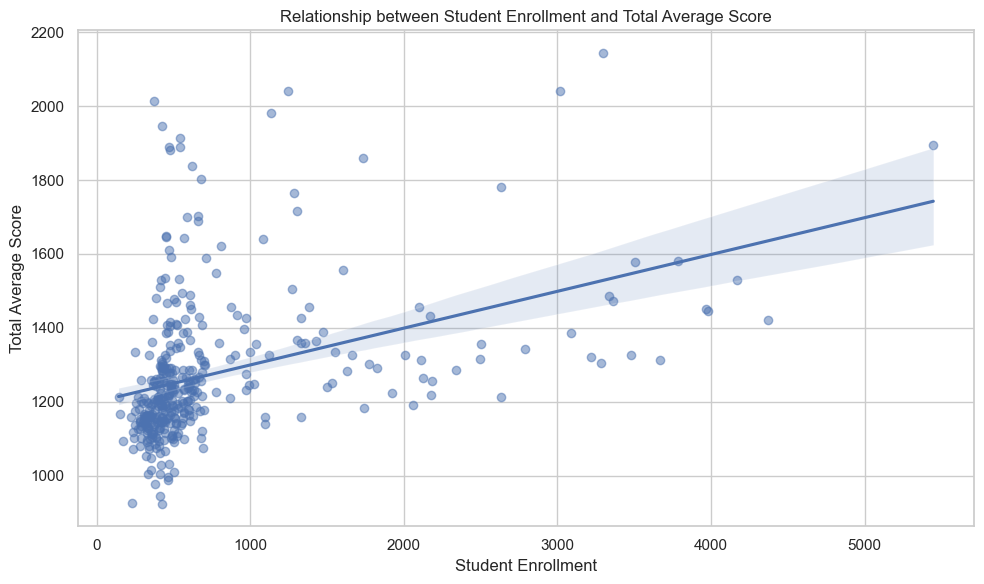

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create scatter plot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Student Enrollment', y='Total Average Score', data=cleaned_data, scatter_kws={'alpha':0.5})

# Add labels and title
plt.title('Relationship between Student Enrollment and Total Average Score')
plt.xlabel('Student Enrollment')
plt.ylabel('Total Average Score')

# Show plot
plt.tight_layout()
plt.show()


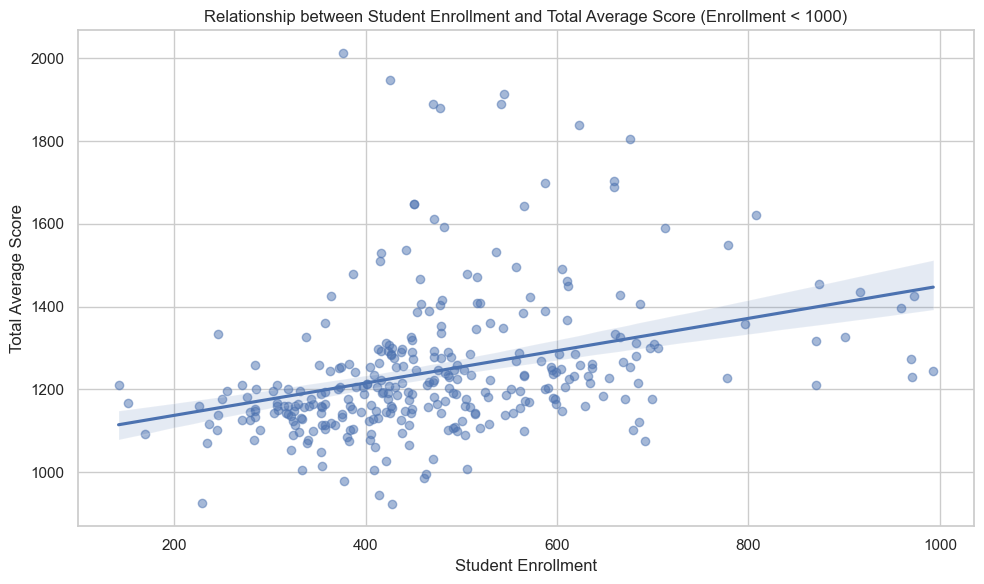

In [50]:


# Filter the dataset for schools with student enrollment less than 1000
filtered_less1000 = cleaned_data[cleaned_data['Student Enrollment'] < 1000]

# Set plot style
sns.set(style="whitegrid")

# Create scatter plot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Student Enrollment', y='Total Average Score', data=filtered_less1000, scatter_kws={'alpha':0.5})

# Add labels and title
plt.title('Relationship between Student Enrollment and Total Average Score (Enrollment < 1000)')
plt.xlabel('Student Enrollment')
plt.ylabel('Total Average Score')

# Show plot
plt.tight_layout()
plt.show()


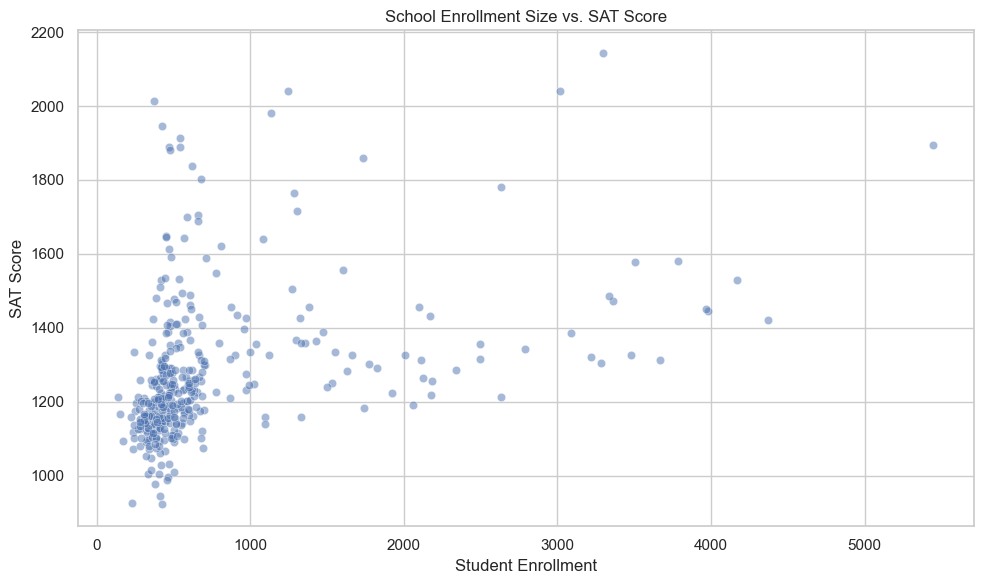

In [51]:
# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Student Enrollment', y='SAT Score', data=cleaned_data, alpha=0.5)

# Add labels and title
plt.title('School Enrollment Size vs. SAT Score')
plt.xlabel('Student Enrollment')
plt.ylabel('SAT Score')

# Show plot
plt.tight_layout()
plt.show()

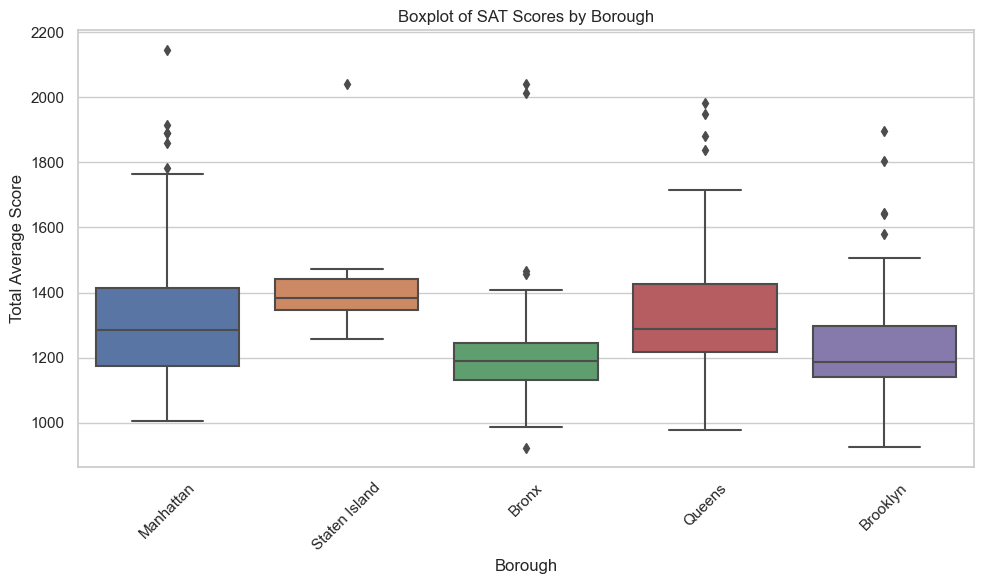

In [129]:
# Assuming 'Borough' is a column in your dataframe
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Borough', y='Total Average Score', data=cleaned_score)
plt.title('Boxplot of SAT Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\35911\AppData\Local\Temp\ipykernel_35032\4037298493.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Borough', y='Total Average Score', data=cleaned_score, ci=None)


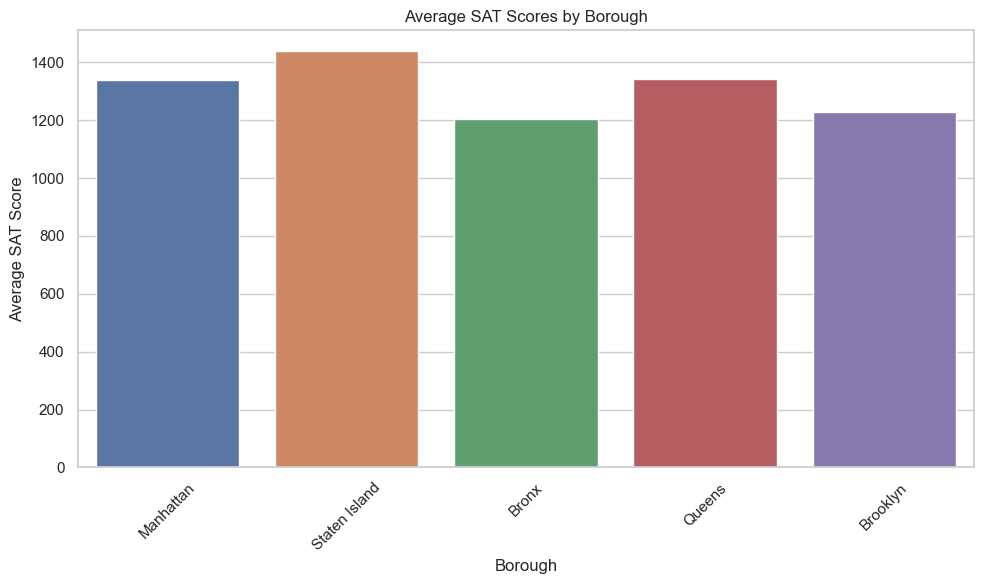

In [131]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Borough', y='Total Average Score', data=cleaned_score, ci=None)
plt.title('Average SAT Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Average SAT Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

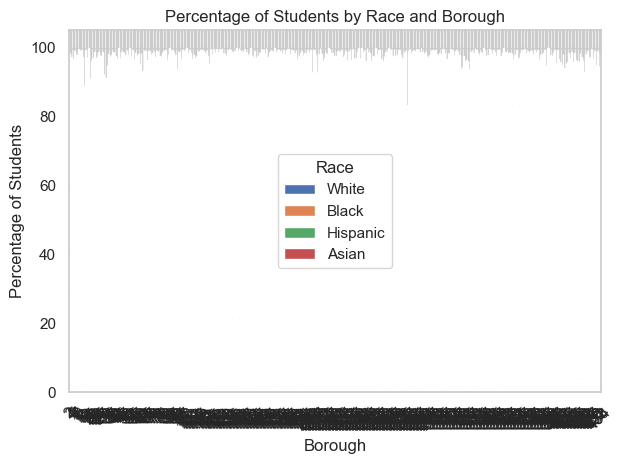

In [134]:
# Assuming 'Borough', 'White (%)', 'Black (%)', 'Hispanic (%)', and 'Asian (%)' are columns in your dataframe

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Plot the stacked bar plot
cleaned_score[['White', 'Black', 'Hispanic', 'Asian']].plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Percentage of Students by Race and Borough')
plt.xlabel('Borough')
plt.ylabel('Percentage of Students')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.tight_layout()

# Show the plot
plt.show()


## Conclusion

## Reference